<H1> Classification avec le jeu de données TITANIC </H1>

L'objectif est de poursuivre le TP précédente où de nombreux prétraitements ont été effecutés en ingénierie des données pour pouvoir faire un modèle de prédiction des survivants ou non.


## **Installation**



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.

In [1]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install ..

# ne pas oublier de relancer le kernel du notebook

In [2]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Pour pouvoir lire et sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire google drive : 

In [4]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML_FDS'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/ML_FDS


'/content/gdrive/My Drive/Colab Notebooks/ML_FDS'

## **Travaux pratiques**

Si vous n'avez pas terminé le TP précédent vous pouvez récupérer le fichier titanic2.csv qui contient les différentes transformations. Le mettre dans le répertoire Dataset.

In [5]:
df=pd.read_csv('titanic2.csv', sep=';')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,4,1,0,0,2
1,1,1,0,0,1,0,3,0
2,1,3,0,6,0,0,0,2
3,1,1,0,6,1,0,3,2
4,0,3,1,6,0,0,1,2


Il faut maintenant définir les variables d'apprentissage et la variable à prédire. Ici Suvived est la variable à prédire. 
Attention elle est positionné à la première colonne. 

In [6]:
array = df.values
X = array[:,1:8] 
y = array[:,0]


Découper le jeu de données en jeu de test et jeu d'apprentissage. Prenez 30% du jeu de données pour le test. 

In [7]:

validation_size=0.3 #30% du jeu de données pour le test

testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                 train_size=validation_size, 
                 random_state=seed,test_size=testsize)



** Essai d'un classifieur **  

Avec le classifieur GaussianNB effectuer une première prédiction en donnant la valeur de l'accuracy.

In [8]:
clf = GaussianNB()
clf.fit(X_train, y_train)

result = clf.predict(X_test)

print('\n accuracy :', 
      accuracy_score(result, y_test),'\n')


 accuracy : 0.7155963302752294 



Afficher la matrice de confusion et le classification report.

In [9]:
conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)

print ('\n',classification_report(y_test, 
                                  result))


 matrice de confusion 
 [[57 17]
 [14 21]]

               precision    recall  f1-score   support

           0       0.80      0.77      0.79        74
           1       0.55      0.60      0.58        35

    accuracy                           0.72       109
   macro avg       0.68      0.69      0.68       109
weighted avg       0.72      0.72      0.72       109





Effectuer une cross validation avec 10 splits (Kfold)

In [10]:
seed=7
k_fold = KFold(n_splits=10, 
               shuffle=True, random_state=seed)

Appliquer le classifieur GaussianNB et donner les différentes accuracy pour les 10 évaluations.

In [11]:
clf = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(clf, X, y, 
                        cv=k_fold, scoring=scoring)

print('Les différentes accuracy pour les 10 évaluations sont : \n',score,'\n')
print ('Accuracy moyenne : ',score.mean(),
       ' standard deviation', score.std())


Les différentes accuracy pour les 10 évaluations sont : 
 [0.8125     0.8125     0.75       0.75       0.875      0.86666667
 0.73333333 0.8        0.73333333 0.73333333] 

Accuracy moyenne :  0.7866666666666667  standard deviation 0.051901348730066764


** Essai de plusieurs classifieurs **

Utiliser à présent différents classifieurs : KNeighborsClassifier, DecisionTreeClassifier, GaussianNB, SVC et RandomForestClassifier.

In [12]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFO', RandomForestClassifier()))

Quels sont les résultats des classifications ? Quel est le classifieur le plus efficace ? 

In [13]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X, 
                                 y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), 
                           cv_results.std())
    print(msg)       

KNN: 0.688333 (0.111676)
CART: 0.702917 (0.076036)
NB: 0.786667 (0.051901)
SVM: 0.735000 (0.068572)
RFO: 0.748333 (0.107790)


A l'aide de boxplot afficher les résultats des différents classifieurs. 

[Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'RFO')]

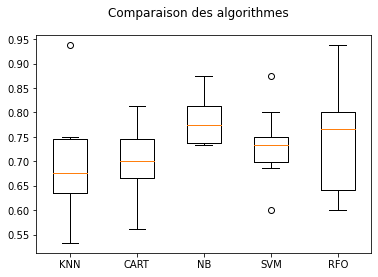

In [14]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

Le classifieur RandomForestClassifier donne de meilleurs résultats. A l'aide de GridSearch, évaluer les différents paramètres :  
  grid_param = {'n_estimators': [4, 6, 9],   
     'max_features': ['log2', 'sqrt','auto'],   
     'criterion': ['entropy', 'gini'],  
     'max_depth': [2, 3, 5, 10],   
     'min_samples_split': [2, 3, 5],  
     'min_samples_leaf': [1,5,8]  
      }  

In [15]:
grid_param = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

gd_sr = GridSearchCV(estimator=RandomForestClassifier(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                    return_train_score=True)



Quelle est la meilleure accuracy et pour quels paramètres ? 

In [16]:
gd_sr.fit(X_train, y_train)  
print ('meilleur score ',
       gd_sr.best_score_,'\n')
print ('meilleurs paramètres', 
       gd_sr.best_params_,'\n')
print ('meilleur estimateur',
       gd_sr.best_estimator_,'\n')

meilleur score  0.8022222222222222 

meilleurs paramètres {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4} 

meilleur estimateur RandomForestClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       min_samples_leaf=5, n_estimators=4) 



GaussianNB obtient un assez bon score mais il n'a pas d'hyperparamètres à rechercher. Il est suivi par DecisisionTreeClassifier et SVC.   

Appliquer GridSearchCV pour ces deux classifieurs.

In [17]:
from sklearn.tree import DecisionTreeClassifier


grid_param = {  
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
}


gd_sr = GridSearchCV(estimator=DecisionTreeClassifier(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

gd_sr.fit(X_train, y_train)  
print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

meilleur score  0.78 

meilleurs paramètres {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1} 

meilleur estimateur DecisionTreeClassifier(max_depth=1) 



In [18]:
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001, 0.01, 0.1, 1], 
    'kernel': ['linear','rbf']}

gd_sr = GridSearchCV(estimator=SVC(),  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)  

print ('meilleur score ',
       gd_sr.best_score_,'\n')
print ('meilleurs paramètres', 
       gd_sr.best_params_,'\n')
print ('meilleur estimateur',
       gd_sr.best_estimator_,'\n')



meilleur score  0.7377777777777778 

meilleurs paramètres {'C': 1, 'gamma': 0.001, 'kernel': 'linear'} 

meilleur estimateur SVC(C=1, gamma=0.001, kernel='linear') 



Vous constatez que RandomForestClassifier et DecisionTreeClassifier peuvent avoir la même accuracy.  
Faire un gridsearch avec les deux classifieurs en prenant les paramètres précédents.

In [19]:
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params = {'RandomForestClassifier' : 
          [{'n_estimators': [4, 6, 9]}, 
            {'max_features': ['log2', 'sqrt','auto']}, 
            {'criterion': ['entropy', 'gini']},
            {'max_depth': [2, 3, 5, 10]}, 
            {'min_samples_split': [2, 3, 5]},
            {'min_samples_leaf': [1,5,8]}],
           'DecisionTreeClassifier': 
          [{'max_depth': [1,2,3,4,5,6,7,8,9,10]},
    {'criterion': ['gini', 'entropy']},
    {'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}]}



In [20]:
class Result:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))

       
results = []
for key,value in classifiers.items():
    gd_sr = GridSearchCV(estimator=value,  
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=10,
                     n_jobs=1)
    gd_sr.fit(X_train, y_train)  
    result=Result(key,gd_sr.best_score_,
                  gd_sr.best_estimator_)
    results.append(result)   
    
    
    
results=sorted(results, 
               key=lambda result: result.score, 
               reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.4f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name,
           ' score %0.4f' %result.score,
           ' avec ',result.parameters,'\n')
    



Le meilleur resultat : 

Classifier :  DecisionTreeClassifier  score 0.7800  avec  DecisionTreeClassifier(max_depth=1) 

Tous les résultats : 

Classifier :  DecisionTreeClassifier  score 0.7800  avec  DecisionTreeClassifier(max_depth=1) 

Classifier :  RandomForestClassifier  score 0.6800  avec  RandomForestClassifier(min_samples_split=3) 



**Conclusion** : il faut toujours faire attention aux paramètres passés dans un classifieur. Ils peuvent tout changer !

**Sauvegarde du modèle**

Sauvegarder le meilleur modèle appris et recharger le pour le tester avec y_test.

In [21]:
clf=gd_sr.best_estimator_
import pickle
filename = 'pkl_Titanicbestmodel.sav'
pickle.dump(clf, open(filename, 'wb'))

In [22]:
clf_loaded = pickle.load(open(filename, 'rb'))
print ('Modèle chargé',clf_loaded,'\n')
result = clf_loaded.predict(X_test)

print('\n accuracy:\n')
print (accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))

Modèle chargé DecisionTreeClassifier(max_depth=1) 


 accuracy:

0.8165137614678899 


 matrice de confusion 
 [[62 12]
 [ 8 27]]

               precision    recall  f1-score   support

           0       0.89      0.84      0.86        74
           1       0.69      0.77      0.73        35

    accuracy                           0.82       109
   macro avg       0.79      0.80      0.80       109
weighted avg       0.82      0.82      0.82       109

